In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Network Intrusion Detection System (NIDS)

## UNSW-NB15

Synthetic data from Australian UNSW University

## Explanatory data analysis and data cleaning

- Most common intrusion
- Data handling (Nans, merges, column names)
- More data info

In [2]:
# All Attacks categories

event_list = pd.read_csv('../data/UNSW-NB15_LIST_EVENTS.csv')
event_list.tail()


,Attack category,Attack subcategory,Number of events
203,Shellcode,Decoders,18
204,Shellcode,Multiple OS,10
205,Shellcode,Solaris,12
206,Worms,,174
207,NaN,Total,2540044


In [3]:
# We delete normal attacks to see more clearly the rest of attack categories

event_list['Attack category'] = pd.Categorical(event_list['Attack category'])
event_list['Attack category'] = event_list['Attack category'].cat.remove_categories('normal')
event_list['Attack category'] = event_list['Attack category'].cat.remove_categories('Generic')
print(event_list['Attack category'])

0            NaN
1       Fuzzers 
2       Fuzzers 
3       Fuzzers 
4       Fuzzers 
         ...    
203    Shellcode
204    Shellcode
205    Shellcode
206        Worms
207          NaN
Name: Attack category, Length: 208, dtype: category
Categories (11, object): [' Fuzzers', ' Fuzzers ', ' Reconnaissance ', ' Shellcode ', ..., 'Exploits', 'Reconnaissance', 'Shellcode', 'Worms']


In [4]:
# Counting attacks categories

print(event_list['Attack subcategory'].value_counts(),'\n',('-.')*30, event_list['Attack category'].value_counts())

SMTP              5
HTTP              5
TFTP              4
Telnet            4
DNS               4
                 ..
IIS Web Server    1
 SMTP             1
Cisco Skinny      1
Browser           1
Total             1
Name: Attack subcategory, Length: 152, dtype: int64 
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. Exploits            75
DoS                 46
 Shellcode          15
Shellcode           15
Reconnaissance      14
 Reconnaissance     13
 Fuzzers            10
 Fuzzers             3
Analysis             3
Backdoors            1
Worms                1
Name: Attack category, dtype: int64


In [5]:
event_list['Attack category']

0            NaN
1       Fuzzers 
2       Fuzzers 
3       Fuzzers 
4       Fuzzers 
         ...    
203    Shellcode
204    Shellcode
205    Shellcode
206        Worms
207          NaN
Name: Attack category, Length: 208, dtype: category
Categories (11, object): [' Fuzzers', ' Fuzzers ', ' Reconnaissance ', ' Shellcode ', ..., 'Exploits', 'Reconnaissance', 'Shellcode', 'Worms']

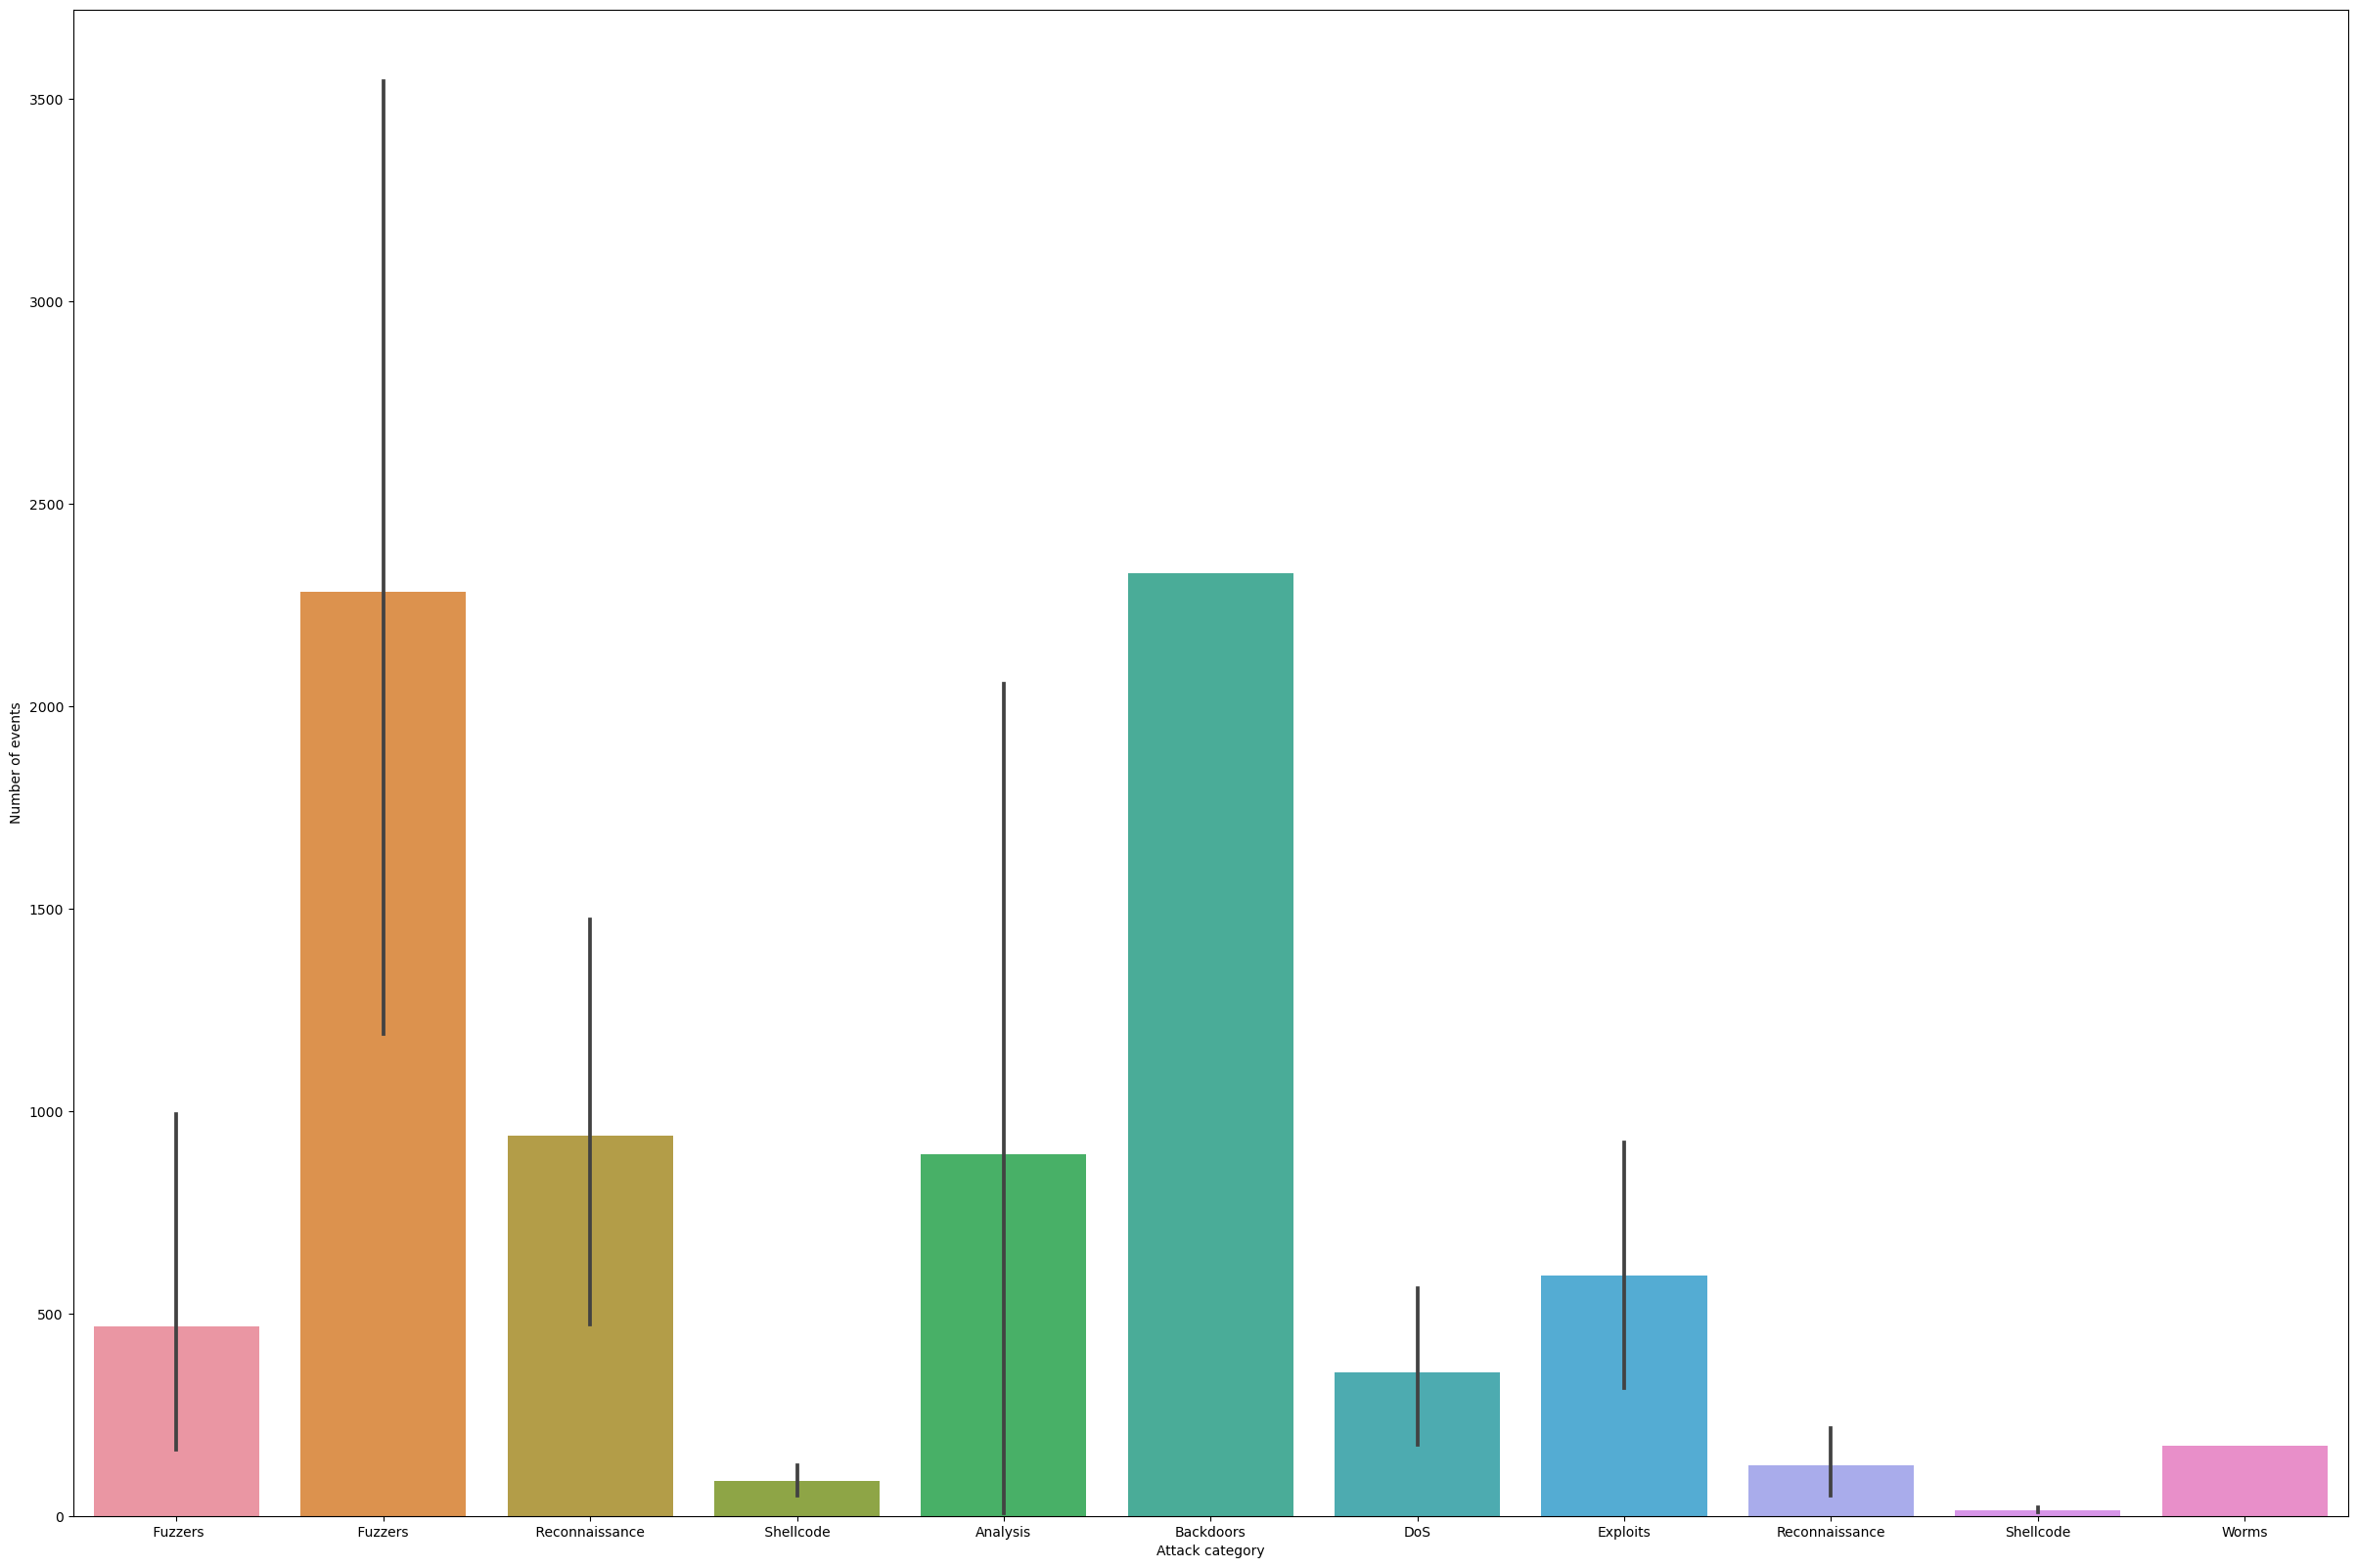

In [6]:
# visualization of the different kind of attacks and its frequency

plt.figure(figsize=(30, 20))
sns.barplot(x=event_list['Attack category'], y=event_list['Number of events']);

In [7]:
# Loading data
import pandas as pd
dfs = []
for i in range(1,5):
    path = '../data/UNSW-NB15_{}.csv'  # trying to do it in one shot
    dfs.append(pd.read_csv(path.format(i), header = None))
df = pd.concat(dfs).reset_index(drop=True)  # all in one

C:\Users\i2u3e\AppData\Local\Temp\ipykernel_30248\1240818386.py:6: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))
C:\Users\i2u3e\AppData\Local\Temp\ipykernel_30248\1240818386.py:6: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header = None))


In [8]:
df.tail() # printing data loaded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,146610.765600,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0,0,NaN,2.0,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0,0,NaN,2.0,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513670,598375.062500,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0,0,2.0,NaN,,1,1,2,4,2,2,2,NaN,0
2540046,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,252,5,6,pop3,4470.913574,5259.898438,12,12,255,255,3026824982,3748412468,48,56,0,0,3903.523582,95.650531,1424262068,1424262069,79.714089,80.827180,0.139446,0.053884,0.085562,0,3,NaN,NaN,,1,1,2,4,2,2,2,Exploits,1


In [9]:
features = pd.read_csv('../data/NUSW-NB15_features.csv', encoding='cp1252')
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [10]:
# naming columns with NUSW-NB15_features.csv

df_col = pd.read_csv('../data/NUSW-NB15_features.csv', encoding='ISO-8859-1')# feature names
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
                                            # modifying names for easier work

df.columns = df_col['Name']
df.tail()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671880,146610.765600,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,NaN,NaN,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0,0,NaN,2.0,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0,0,NaN,2.0,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513670,598375.062500,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0,0,2.0,NaN,,1,1,2,4,2,2,2,NaN,0
2540046,175.45.176.0,17293,149.171.126.17,110,tcp,CON,0.942984,574,676,62,252,5,6,pop3,4470.913574,5259.898438,12,12,255,255,3026824982,3748412468,48,56,0,0,3903.523582,95.650531,1424262068,1424262069,79.714089,80.827180,0.139446,0.053884,0.085562,0,3,NaN,NaN,,1,1,2,4,2,2,2,Exploits,1


In [11]:
df.isna().sum() # cleaning

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [12]:
# According to paper, NaNs in 'attack_cat' are 'normal' attack.

df['attack_cat'] = df['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())
df['is_ftp_login'] = df['is_ftp_login'].fillna(value=0)
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].fillna(value=0)

In [13]:
df.isna().sum()

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_ds

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [15]:
# df.to_csv('../data/ids_limpio.csv') # three minutes to save

- Categorical: 
`['proto', 'service, 'state']`

- Numerical: 
`[‘id’, ‘dur’, ‘spkts’, ‘dpkts’, ‘sbytes’, ‘dbytes’, ‘rate’, ‘sttl’, ‘dttl’, ‘sload’, ‘dload’, ‘sloss’, ‘dloss’, ‘sinpkt’, ‘dinpkt’, ‘sjit’, ‘djit’, ‘swin’, ‘stcpb’, ‘dtcpb’, ‘dwin’, ‘tcprtt’, ‘synack’, ‘ackdat’, ‘smean’, ‘dmean’, ‘trans_depth’, ‘response_body_len’, ‘ct_srv_src’, ‘ct_state_ttl’, ‘ct_dst_ltm’, ‘ct_src_dport_ltm’, ‘ct_dst_sport_ltm’, ‘ct_dst_src_ltm’, ‘ct_ftp_cmd’, ‘ct_flw_http_mthd’, ‘ct_src_ltm’, ‘ct_srv_dst’]`

- Binary: 
`['is_sm_ips_ports', 'is_ftp_login']`

- Target: 
`['attack_cat', 'label']`

In [16]:
df.dtypes.value_counts()

int64      28
float64    12
object      9
dtype: int64

In [17]:
df['service'].unique()  #  "-" is wrong, must be changed to 'None' (paper)



array(['dns', '-', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
       'snmp', 'ssl', 'irc', 'radius', 'dhcp'], dtype=object)

In [18]:
#Changing "-" to "None"
df['service']= np.where(df['service'] == '-', 'None', df['service'])
print(df['service'].unique())




['dns' 'None' 'http' 'smtp' 'ftp-data' 'ftp' 'ssh' 'pop3' 'snmp' 'ssl'
 'irc' 'radius' 'dhcp']


In [19]:
df['ct_ftp_cmd'].unique() # according to the paper this is numerical, no str


array([0, 1, 6, 2, 4, 8, 5, 3, '0', '1', ' ', '2', '4'], dtype=object)

In [20]:
# df['ct_ftp_cmd'] = pd.Int32Dtype(df['ct_ftp_cmd'])

In [21]:
df['is_ftp_login'].unique() # is binary according to paper but still has more numbers

array([0., 1., 2., 4.])

In [22]:
# removing all no binary numbers
df['is_ftp_login'] = np.where(df['is_ftp_login']> 1, 1, df['is_ftp_login'])
df['is_ftp_login'].unique()

array([0., 1.])

In [23]:
# backdoors = backdoor
# also to lowercase
df['attack_cat'] = df['attack_cat'].replace('backdoors', 'backdoor', regex=True).apply(lambda x: x.strip().lower())

df['attack_cat'].unique()

array(['normal', 'exploits', 'reconnaissance', 'dos', 'generic',
       'shellcode', 'fuzzers', 'worms', 'backdoor', 'analysis'],
      dtype=object)

# Exploratory data analysis

In [24]:
df.describe()

Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06,2.540047e+06
mean,6.587916e-01,4.339600e+03,3.642759e+04,6.278197e+01,3.076681e+01,5.163921e+00,1.632944e+01,3.695645e+07,2.450861e+06,3.328884e+01,4.272664e+01,1.500887e+02,1.497459e+02,1.261701e+09,1.261766e+09,1.242536e+02,2.766719e+02,8.325318e-02,4.242118e+03,1.589037e+03,7.300755e+02,1.423261e+09,1.423261e+09,1.933225e+02,7.882476e+01,6.180475e-03,3.287595e-03,2.892880e-03,1.651544e-03,2.611546e-01,1.100779e-01,1.715519e-02,9.206988e+00,8.988958e+00,6.439103e+00,6.900986e+00,4.642139e+00,3.592729e+00,6.845886e+00,1.264870e-01
std,1.392493e+01,5.640599e+04,1.610960e+05,7.462277e+01,4.285089e+01,2.251707e+01,5.659474e+01,1.186043e+08,4.224863e+06,7.628388e+01,1.215020e+02,1.254824e+02,1.255438e+02,1.422027e+09,1.422139e+09,1.519162e+02,3.356166e+02,3.500045e-01,4.750053e+04,1.691036e+04,3.438558e+03,1.134449e+06,1.134448e+06,2.779163e+03,1.433191e+03,4.615863e-02,2.593570e-02,2.394668e-02,4.060563e-02,6.830974e-01,5.564195e-01,1.298495e-01,1.083676e+01,1.082249e+01,8.162034e+00,8.205062e+00,8.477579e+00,6.174445e+00,1.125828e+01,3.323975e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421927e+09,1.421927e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353963e+05,1.191594e+04,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.421952e+09,1.421952e+09,9.000000e-03,6.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,1.200000e+01,2.550000e+02,2.550000e+02,6.397250e+08,6.384172e+08,7.300000e+01,8.900000e+01,0.000000e+00,0.000000e+00,1.912490e+01,2.653561e+00,1.424227e+09,1.424227e+09,4.682620e-01,4.147550e-01,6.130000e-04,4.830000e-04,1.220000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145545e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925974e+06,4.400000e+01,4.200000e+01,2.550000e+02,2.550000e+02,2.467160e+09,2.469411e+09,1.320000e+02,5.650000e+02,0.000000e+00,0.000000e+00,4.137935e+02,6.350857e+01,1.424245e+09,1.424245e+09,7.351427e+00,6.202100e+00,7.020000e-04,5.540000e-04,1.400000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.00000

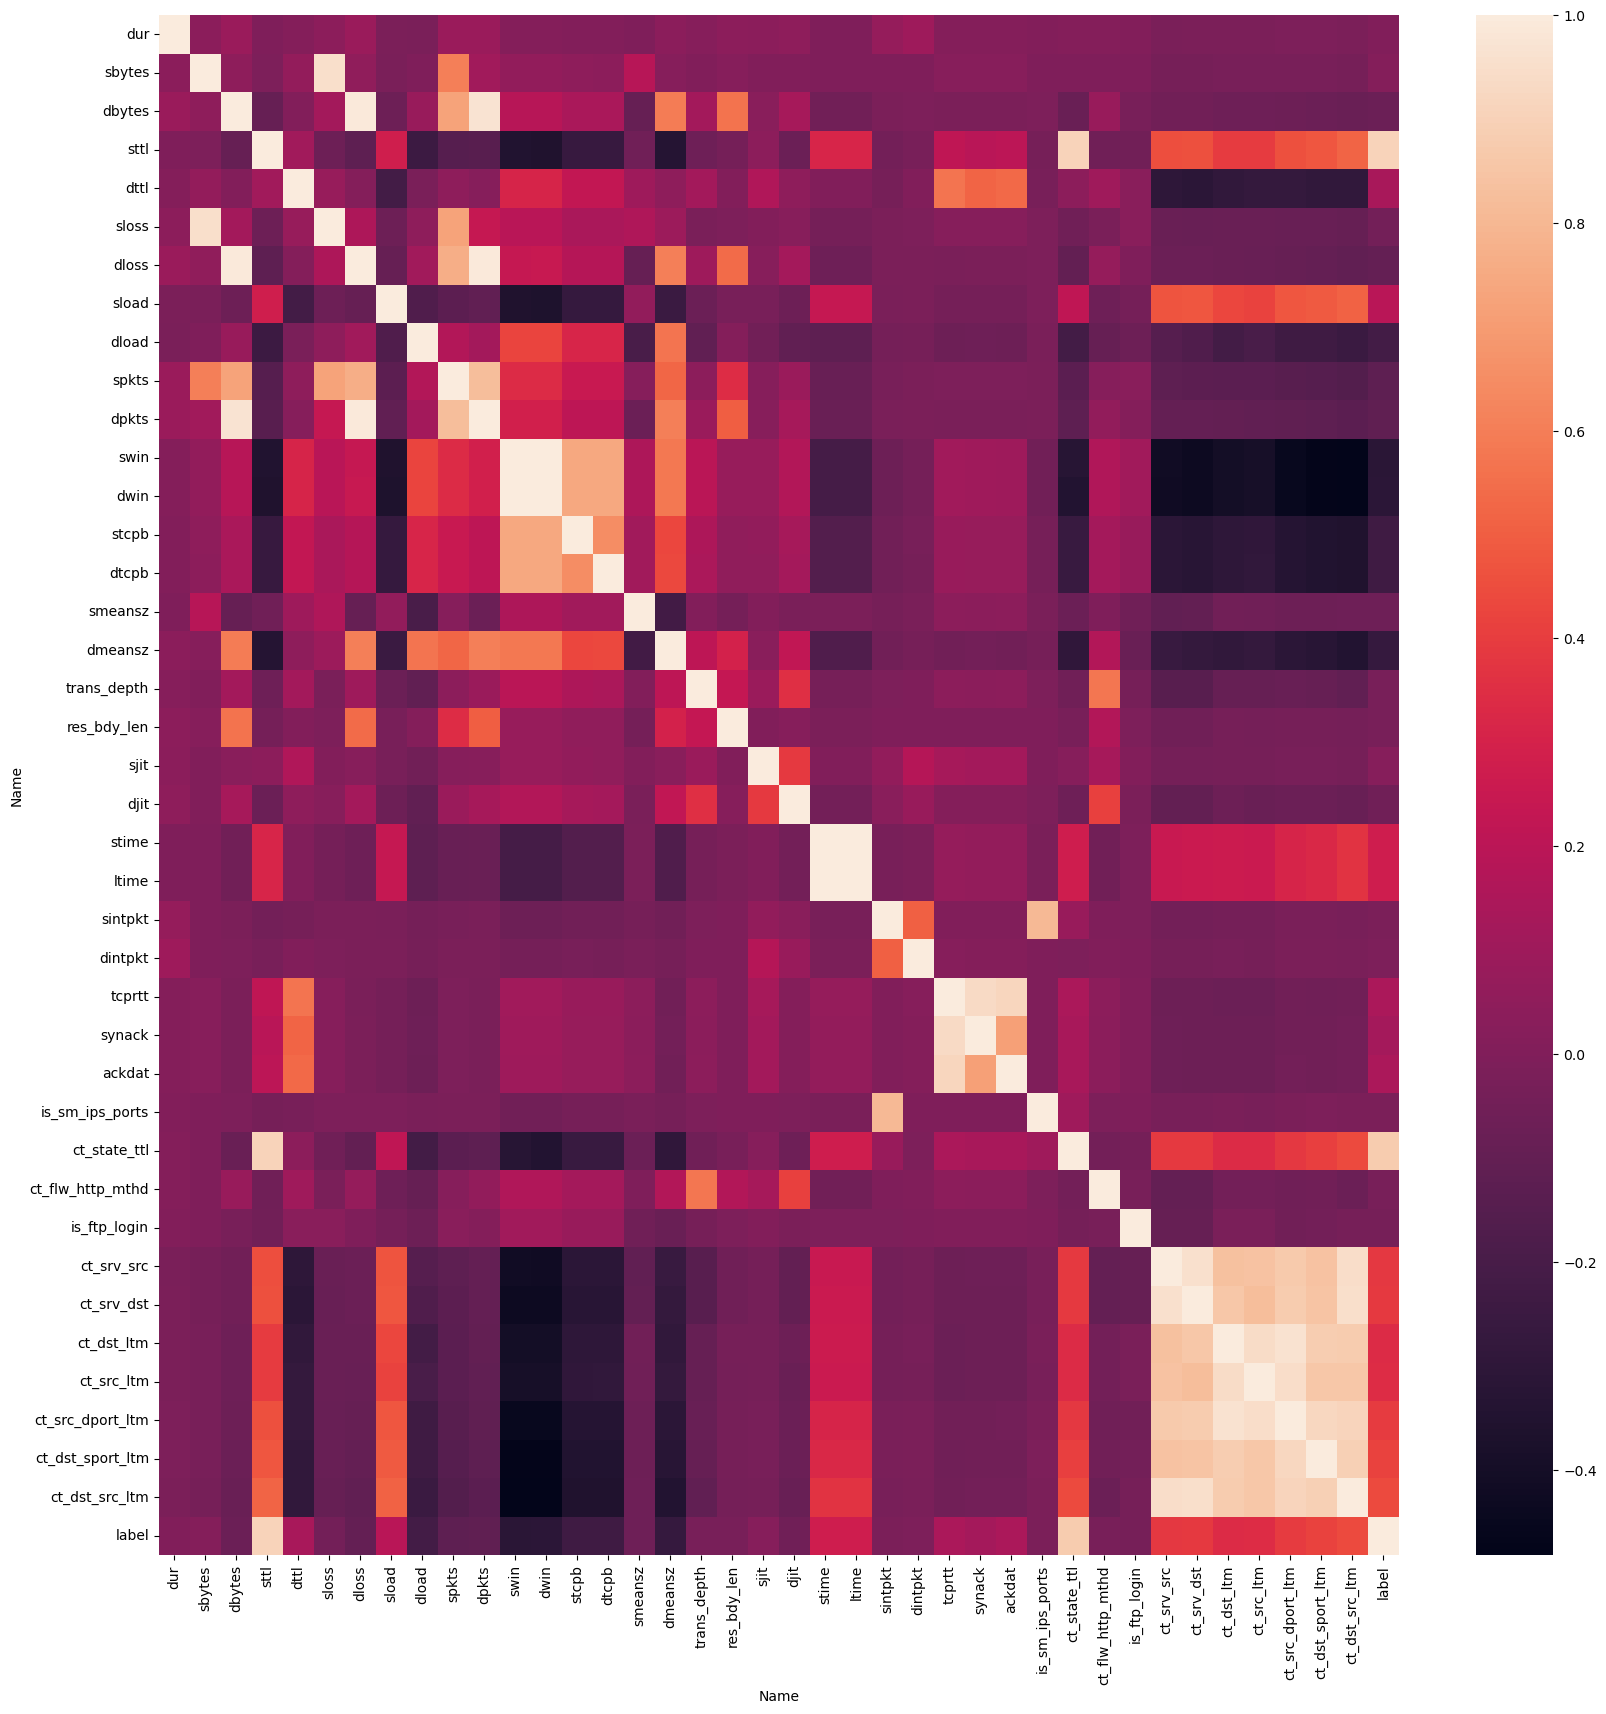

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr());

In [26]:
# Eliminating correlated features

In [27]:
df.memory_usage().sum()

995698552

In [28]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype
def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            # skip datetime type or categorical type
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [29]:
from sklearn import preprocessing

In [30]:
# normalization, standarization, min_max

def standardize(df):
    return (df-df.mean())/df.std()
    
def min_max(df):
    return (df-df.min())/(df.max() - df.min())

def normalize(df):
    return pd.DataFrame(preprocessing.normalize(df), columns=df.columns)

In [31]:
total = df

In [32]:
total = reduce_mem_usage(total)

Memory usage of dataframe is 949.57 MB
Memory usage after optimization is: 455.41 MB
Decreased by 52.0%


In [33]:
df.memory_usage().sum() # from 995698552

477528964

### Features

In [34]:
features['Name'] = features['Name'].str.lower()

In [35]:
normal = df[df['label'] == 0]
anomaly = df[df['label'] == 1]

In [36]:
df.dtypes.value_counts()


float32    12
int16      11
int8       10
object      9
int32       5
int64       2
dtype: int64

In [37]:
# Note:
    # Existen 4 columnas categóricas -> 'attack_cat', 'state', 'service', 'proto'
    # 'attack_cat' es target, por lo que no cuenta
    # Categóricas pero en forma de integral -> 'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login'
    # Es decir: 'attack_cat', 'state', 'service', 'proto', 'is_sm_ips_ports', 'ct_state_ttl', 'is_ftp_login'

In [38]:
df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.937500,621800.937500,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,3,7,1,3,1,1,1,normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,None,87676.085938,50480.171875,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,2,4,2,3,1,1,2,normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.531250,636282.375000,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,12,8,1,2,2,1,1,normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.562500,542597.187500,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,6,9,1,1,1,1,1,normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.250000,609067.562500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,7,9,1,1,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671875,146610.765625,6,8,255,255,4035116044,222196311,53,229,0,0,1221.136597,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,0,0.0,0.0,,1,2,3,3,1,1,3,normal,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,255,1529727621,185369967,57,58,0,0,3961.093262,129.038361,1424262068,1424262069,51.976997,72.915604,0.000609,0.000477,0.000132,0,0,0.0,1.0,2,2,2,2,2,2,2,2,normal,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,255,497208793,889904111,56,70,0,0,13233.728516,379.052765,1424262062,1424262069,204.359818,214.372375,0.000617,0.000485,0.000132,0,0,0.0,1.0,2,2,2,4,2,2,2,2,normal,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513672,598375.062500,58,116,255,255,1289728069,3436097151,60,1432,1,79745,2868.893066,1951.035889,1424262067,1424262069,38.609699,19.133825,0.000680,0.000541,0.000139,0,0,2.0,0.0,,1,1,2,4,2,2,2,normal,0


In [39]:
cldf = df.drop(['attack_cat', 'is_sm_ips_ports', 'ct_flw_http_mthd', 'trans_depth', 'dwin', 'ct_ftp_cmd', 'is_ftp_login'], axis=1, inplace=True)

In [40]:
def feature_engineer(df):
    df.loc[df['state'].isin(['FIN', 'INT', 'CON', 'REQ', 'RST']), 'state'] = 'others'
    df.loc[df['service'].isin(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']), 'service'] = 'others'
    df.loc[df['proto'].isin(['igmp', 'icmp', 'rtp']), 'proto'] = 'igmp_icmp_rtp'
    df.loc[~df['proto'].isin(['tcp', 'udp', 'arp', 'ospf', 'igmp_icmp_rtp']), 'proto'] = 'others'
    return df

def get_cat_columns(df):
    categorical = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical.append(col)
    return categorical

In [ ]:
x

In [ ]:




x_train, x_test = feature_engineer(x_train), feature_engineer(x_test)

categorical_columns = get_cat_columns(x_train)
non_categorical_columns = [x for x in x_train.columns if x not in categorical_columns]

scaler = StandardScaler()
x_train[non_categorical_columns] = scaler.fit_transform(x_train[non_categorical_columns])
x_test[non_categorical_columns] = scaler.transform(x_test[non_categorical_columns])


x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
print("Column mismatch {0}, {1}".format(set(x_train.columns)- set(x_test.columns),  set(x_test.columns)- set(x_train.columns)))
features = list(set(x_train.columns) & set(x_test.columns))

print(f"Number of features {len(features)}")
x_train = x_train[features]
x_test = x_test[features]



In [41]:
df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,stcpb,dtcpb,smeansz,dmeansz,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.937500,621800.937500,2,2,0,0,0,66,82,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,3,7,1,3,1,1,1,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,None,87676.085938,50480.171875,4,4,0,0,0,132,76,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0,2,4,2,3,1,1,2,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.531250,636282.375000,2,2,0,0,0,73,89,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0,12,8,1,2,2,1,1,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.562500,542597.187500,2,2,0,0,0,66,82,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0,6,9,1,1,1,1,1,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.250000,609067.562500,2,2,0,0,0,73,89,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0,7,9,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,29,1,2,ftp-data,24465.671875,146610.765625,6,8,255,4035116044,222196311,53,229,0,1221.136597,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0,1,2,3,3,1,1,3,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,29,2,2,ftp,8743.816406,6333.240234,8,6,255,1529727621,185369967,57,58,0,3961.093262,129.038361,1424262068,1424262069,51.976997,72.915604,0.000609,0.000477,0.000132,0,2,2,2,2,2,2,2,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,29,7,9,ftp,2204.839844,2549.582764,32,30,255,497208793,889904111,56,70,0,13233.728516,379.052765,1424262062,1424262069,204.359818,214.372375,0.000617,0.000485,0.000132,0,2,2,4,2,2,2,2,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,29,2,57,http,12496.513672,598375.062500,58,116,255,1289728069,3436097151,60,1432,79745,2868.893066,1951.035889,1424262067,1424262069,38.609699,19.133825,0.000680,0.000541,0.000139,0,1,1,2,4,2,2,2,0


In [42]:
df.to_csv('../data/fengineering.csv')